In [559]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Gathering Data:

**Read in WeRateDogs Twitter archive data.**

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

**Download the image_predictions file**

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

**Read in image_predictions**

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

**Load in keys and get api data**

In [7]:
consumer_key = 'key'
consumer_secret = 'key'
access_token = 'key'
access_token_secret = 'key'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
tweet_data = {}
num_error = 0

for tweet in twitter_archive['tweet_id']:
    
    try:
        
        tweet_status = api.get_status(tweet, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        tweet_data[str(tweet)] = tweet_status._json
        
    except:
        
        print("Error for: " + str(tweet))
        num_error += 1
        

print("Number of errors: " + str(num_error))


Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977


Rate limit reached. Sleeping for: 650


Error for: 802247111496568832
Error for: 775096608509886464


Rate limit reached. Sleeping for: 677
Rate limit reached. Sleeping for: 681


Number of errors: 11


**Write tweet_data to text file**

In [12]:
with open('tweet_json.txt', 'a') as outfile:
    json.dump(tweet_data, outfile)


**Read in tweet_json data**

In [15]:
retweet_data = pd.read_json('tweet_json.txt')

# Assessing Data:

### Twitter Archive table

In [461]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', 200)

In [465]:
twitter_archive.head(50)

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                    text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0   892420643555336193                    NaN                  NaN  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                           This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                  NaN                       NaN                        NaN   
1   892177421306343426                    NaN                  NaN  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                  NaN                       NaN                        NaN   
2   891815181378084864                    NaN                  NaN  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                       NaN                        NaN   
3   891689557279858688                    NaN                  NaN  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                 This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                  NaN                       NaN                        NaN   
4   891327558926688256                    NaN                  NaN  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f                  NaN                       NaN                        NaN   
5   891087950875897856                    NaN                  NaN  2017-07-29 00:08:17 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh                  NaN                       NaN                        NaN   
6   890971913173991426                    NaN                  NaN  2017-07-28 16:27:12 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl                  NaN                       NaN                        NaN   
7   890729181411237888                    NaN                  NaN  2017-07-28 00:22:40 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                          When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                  NaN                       NaN                        NaN   
8   890609185150312448                    NaN                  NaN  2017-07-27 16:25:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                      This is 

- **The rating_numerator was extracted incorrectly. Ratings such as 13.5/10 extracted 5 instead of 13.5**


- **The dog stages are in multiple columns instead of one, i.e. doggo, floofer, pupper, and puppo**

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- **Missing values for the 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', and 'expanded_urls' columns**


- **Incorrect data types (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, puppo)**


In [332]:
twitter_archive['tweet_id'].value_counts().head()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: tweet_id, dtype: int64

In [29]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- **Invalid rating_denominator values. Should only be 10**

In [30]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- **Invalid rating_numerator values. 11,12,13,14,15 may be valid but the other numbers are too arbitrary and has low count. 15 also has low count. Values greater than 15 seem to be random and it is unclear if these are serious ratings. The 0 rating is also invalid.**

### Image predictions table

In [333]:
image_predictions.head()

tweet_id                                          jpg_url  img_num                      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog                   p3   p3_conf  p3_dog
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1  Welsh_springer_spaniel  0.465074    True              collie  0.156665    True    Shetland_sheepdog  0.061428    True
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1                 redbone  0.506826    True  miniature_pinscher  0.074192    True  Rhodesian_ridgeback  0.072010    True
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1         German_shepherd  0.596461    True            malinois  0.138584    True           bloodhound  0.116197    True
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1     Rhodesian_ridgeback  0.408143    True             redbone  0.360687    True   miniature_pinscher  0.222752    True
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1      miniature_pinscher  0.560311    True          Rottweiler  0.243682    True             Doberman  0.154629    True

In [36]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

- **Names under p1 inconsistently capital/lowercase**


- **Names under p2 inconsistently capital/lowercase**

In [35]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- **Incorrect datatypes ('tweet_id', img_num)**

### Retweet table

In [334]:
retweet_data

1991-02-08 13:48:08.022790149                                                                                                                                                                            1991-02-08 16:08:05.002620928  \
contributors                                                                                                                                                                                                                      None                                                                                                                                                                                                     None   
coordinates                                                                                                                                                                                                                       None                                                                                                                                                                                                     None   
created_at                                                                                                                                                                                              Sun Nov 15 22:32:08 +0000 2015                                                                                                                                                                           Sun Nov 15 23:05:30 +0000 2015   
entities                       {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/medi...  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/medi...   
extended_entities              {'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.co...  {'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.co...   
favorite_count                                                                                                                                                                                                                    2560                                                                                                                                                                                                      131   
favorited                                                                                                                                                                                                                        False                                                                                                                                                                                                    False   
geo                                                                                                                                                                                                                               None                                                                                                                                                                                                     None   
id                                                                                                                                                                                                                  666020888022790149                                                        

- **Variables as rows instead of columns**


- **Incorrect data types (as a result of above)**


- **The text column here is duplicated information from the text column under twitter_archive**



# Cleaning

### Twitter Archive table

In [736]:
df = twitter_archive.copy()

**Define**

Remove columns with missing data except expanded_urls

**Code**

In [737]:
del df['in_reply_to_status_id']
del df['in_reply_to_user_id']
del df['retweeted_status_id']
del df['retweeted_status_user_id']
del df['retweeted_status_timestamp']

**Test**

In [738]:
df.head()

tweet_id                  timestamp                                                                              source                                                                                                                                                                text                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name doggo floofer pupper  \
0  892420643555336193  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1                13                  10   Phineas  None    None   None   
1  892177421306343426  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1                13                  10     Tilly  None    None   None   
2  891815181378084864  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1                12                  10    Archie  None    None   None   
3  891689557279858688  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1                13                  10     Darla  None    None   None   
4  891327558926688256  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1                12                  10  Franklin  None    None   None   

  puppo  
0  None  
1  None  
2  None  
3  None  
4  None

**Define**

Change the data type of tweet_id to string. 

**Code**

In [739]:
df['tweet_id'] = df['tweet_id'].astype(str)

**Test**

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


**Define**

Extract correct rating_numerator values. Remove invalid ones.

**Code**

In [741]:
pattern = "(?<![\/\d])(\d+\.?\d*)\/(\d+)(?![\/\d])"

In [742]:
ratings = []
i = 0
for tweet in df['text']:
    match = re.findall(pattern, tweet)
    
    #There is one tweet with a date, not a rating
    if len(match) == 0:
        match = [('1000', '10')]
    
    #Some tweets have two ratings, the second rating is their true rating
    second_rating = match[-1]
    rating_num = second_rating[0]
    
    #Strange case where 10 is the real rating
    if rating_num == '007':
        rating_num = '10' 
        
    #Convert to float
    rating_num = float(rating_num)
    
    #Round to nearest integer
    rating_num = round(rating_num)
    
    #Convert to integer
    rating_num = int(rating_num)
    
    ratings.append(rating_num)

In [743]:
#Delete old rating_numerator
del df['rating_numerator']

#Insert new rating_numerator
df['rating_numerator'] = np.array(ratings).astype('int64')

In [744]:
#Remove the tweet with no rating attached
df = df.drop(df[df['rating_numerator'] == 1000].index)

**Test**

In [745]:
df

tweet_id                  timestamp                                                                               source                                                                                                                                                                       text  \
0     892420643555336193  2017-08-01 16:23:56 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                              This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     892177421306343426  2017-08-01 00:17:27 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>         This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2     891815181378084864  2017-07-31 00:18:03 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3     891689557279858688  2017-07-30 15:58:51 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     891327558926688256  2017-07-29 16:00:24 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>         This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
5     891087950875897856  2017-07-29 00:08:17 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>         Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
6     890971913173991426  2017-07-28 16:27:12 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl   
7     890729181411237888  2017-07-28 00:22:40 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                             When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq   
8     890609185150312448  2017-07-27 16:25:51 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b   
9     890240255349198849  2017-07-26 15:59:51 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>              This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A   
10    890006608113172480  2017-07-26 00:31:25 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                 This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme   
11    889880896479866881  2017-07-25 16:11:53 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                        This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy 

In [746]:
df[df['rating_numerator'] == 1000]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_denominator, name, doggo, floofer, pupper, puppo, rating_numerator]
Index: []

**Define**

Combine doggo, floofer, pupper, puppo columns into one column and change to category type

**Code**

In [747]:
df['dog_stage'] = np.where(df['doggo'] == 'doggo', 'Doggo',
                  np.where(df['floofer'] == 'floofer', 'Floofer',
                  np.where(df['pupper'] == 'pupper', 'Pupper',
                  np.where(df['puppo'] == 'puppo', 'Puppo', 'Other'))))

In [748]:
#Delete old columns
del df['doggo']
del df['floofer']
del df['pupper']
del df['puppo']

In [749]:
df['dog_stage'] = df['dog_stage'].astype('category')

**Test**

In [750]:
df.head(50)

tweet_id                  timestamp                                                                              source                                                                                                                                                                    text  \
0   892420643555336193  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                           This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1   892177421306343426  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2   891815181378084864  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3   891689557279858688  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                 This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4   891327558926688256  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
5   891087950875897856  2017-07-29 00:08:17 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
6   890971913173991426  2017-07-28 16:27:12 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl   
7   890729181411237888  2017-07-28 00:22:40 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                          When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq   
8   890609185150312448  2017-07-27 16:25:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                      This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b   
9   890240255349198849  2017-07-26 15:59:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>           This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A   
10  890006608113172480  2017-07-26 00:31:25 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>              This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme   
11  889880896479866881  2017-07-25 16:11:53 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                     This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g   
12  889665388333682689  2017-07-25 01:55:32 +0000

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2355 non-null object
timestamp             2355 non-null object
source                2355 non-null object
text                  2355 non-null object
expanded_urls         2297 non-null object
rating_denominator    2355 non-null int64
name                  2355 non-null object
rating_numerator      2355 non-null int64
dog_stage             2355 non-null category
dtypes: category(1), int64(2), object(6)
memory usage: 168.1+ KB


**Define**

Change all rating_denominator values to 10 if not already

**Code**

In [752]:
df['rating_denominator'] = 10

**Test**

In [753]:
df['rating_denominator'].value_counts()

10    2355
Name: rating_denominator, dtype: int64

**Define**

Convert rating_numerator values of 15 or greater to 14 even though it is unclear whether they are serious ratings. Pool the 0 ratings to with the 1 ratings since rating systems are from 1 to 10.

**Code**

In [754]:
df['rating_numerator'] = np.where(df['rating_numerator'] > 14, 14, df['rating_numerator'])
df['rating_numerator'] = np.where(df['rating_numerator'] == 0, 1, df['rating_numerator'])

**Test**

In [755]:
df['rating_numerator'].value_counts()

12    557
11    468
10    458
13    355
9     156
8     104
14     78
7      55
5      34
6      33
3      19
4      17
1      11
2      10
Name: rating_numerator, dtype: int64

**Create copy of cleaned data**

In [756]:
twitter_archive_clean = df.copy()

### Image predictions table

In [757]:
df = image_predictions.copy()

**Define**

Change the data type of tweet_id to string, img_num to category

**Code**

In [758]:
df['tweet_id'] = df['tweet_id'].astype(str)
df['img_num'] = df['img_num'].astype('str').astype('category')

**Test**

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


**Define**

Capitalize every word in p1 and p2

**Code**

In [760]:
df['p1'] = df['p1'].str.replace('_', ' ').str.title()
df['p2'] = df['p2'].str.replace('_', ' ').str.title()

**Test**

In [761]:
df['p1'].value_counts()

Golden Retriever                  150
Labrador Retriever                100
Pembroke                           89
Chihuahua                          83
Pug                                57
Chow                               44
Samoyed                            43
Toy Poodle                         39
Pomeranian                         38
Malamute                           30
Cocker Spaniel                     30
French Bulldog                     26
Miniature Pinscher                 23
Chesapeake Bay Retriever           23
Seat Belt                          22
Siberian Husky                     20
German Shepherd                    20
Staffordshire Bullterrier          20
Web Site                           19
Cardigan                           19
Eskimo Dog                         18
Shetland Sheepdog                  18
Teddy                              18
Maltese Dog                        18
Beagle                             18
Shih-Tzu                           17
Lakeland Ter

In [762]:
df['p2'].value_counts()

Labrador Retriever                104
Golden Retriever                   92
Cardigan                           74
Chihuahua                          44
Pomeranian                         42
Chesapeake Bay Retriever           41
French Bulldog                     41
Toy Poodle                         37
Cocker Spaniel                     34
Siberian Husky                     33
Miniature Poodle                   33
Beagle                             28
Collie                             27
Eskimo Dog                         27
Pembroke                           27
Kuvasz                             26
Italian Greyhound                  22
Pekinese                           21
American Staffordshire Terrier     21
Samoyed                            20
Chow                               20
Miniature Pinscher                 20
Malinois                           20
Toy Terrier                        20
Norwegian Elkhound                 19
Boston Bull                        19
Staffordshir

**Create copy of cleaned data**

In [763]:
image_predictions_clean = df.copy()

### Retweet table

In [764]:
df = retweet_data.copy()

**Define**

Make the rows into columns, columns into rows and reset the index. Remove old index.

**Code**

In [765]:
df = df.transpose().reset_index()
del df['index']

**Test**

In [766]:
df.head()

contributors coordinates                      created_at                                                                                                                                                                                                 entities                                                                                                                                                                                        extended_entities favorite_count favorited   geo  \
0         None        None  Sun Nov 15 22:32:08 +0000 2015  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/medi...  {'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.co...           2560     False  None   
1         None        None  Sun Nov 15 23:05:30 +0000 2015  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/medi...  {'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.co...            131     False  None   
2         None        None  Sun Nov 15 23:21:54 +0000 2015  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/medi...  {'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', 'media_url_https': 'https://pbs.twimg.co...            125     False  None   
3         None        None  Mon Nov 16 00:04:52 +0000 2015  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/medi...  {'media': [{'id': 666044217047650304, 'id_str': '666044217047650304', 'indices': [114, 137], 'media_url': 'http://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', 'media_url_https': 'https://pbs.twimg.co...            301     False  None   
4         None        None  Mon Nov 16 00:24:50 +0000 2015  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media...  {'media': [{'id': 666049244999131136, 'id_str': '666049244999131136', 'indices': [97, 120], 'media_url': 'http://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', 'media_url_https': 'https://pbs.twimg.com...            109     False  None   

                   id              id_str in_reply_to_screen_name in_reply_to_status_id in_reply_to_status_id_str in_reply_to_user_id in_reply_to_user_id_str is_quote_status lang place possibly_sensitive possibly_sensitive_appealable quoted_status quoted_status_id quoted_status_id_str retweet_count retweeted retweeted_status                                                                              source  \
0  666020888022790149  666020888022790149                    None                  None                      None                None                    None           False   en  None              False                         False           NaN              NaN                  NaN           520     False              NaN  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  666029285002620928  666029285002620928                    None                  None                      None                None                    None           False   en  None              False

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2345 non-null object
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null object
favorited                        2345 non-null object
geo                              0 non-null object
id                               2345 non-null object
id_str                           2345 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2345 non-null object
lang                             2345 non-null o

**Define**

Extract only the necessary columns. id, retweet_count, and favorite_count. Rename id to tweet_id.

**Code**

In [768]:
df = df[['id', 'retweet_count', 'favorite_count']]
df.rename(columns = {'id': 'tweet_id'}, inplace = True)

**Test**

In [769]:
df.head()

tweet_id retweet_count favorite_count
0  666020888022790149           520           2560
1  666029285002620928            47            131
2  666033412701032449            44            125
3  666044226329800704           141            301
4  666049248165822465            40            109

**Define**

Change the data type of retweet_count to int, favorite_count to int, tweet_id to string

**Code**

In [770]:
df['retweet_count'] = df['retweet_count'].astype('int64')
df['favorite_count'] = df['favorite_count'].astype('int64')
df['tweet_id'] = df['tweet_id'].astype(str)

**Test**

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


**Create copy of cleaned data**

In [772]:
retweet_data_clean = df.copy()

### Combine the three cleaned data sets

In [773]:
twitter_archive_master = pd.merge(left = twitter_archive_clean, right = retweet_data_clean, on = 'tweet_id', how = 'left')

In [774]:
twitter_archive_master = pd.merge(left = twitter_archive_master, right = image_predictions_clean, on = 'tweet_id', how = 'left')

### Save cleaned data to csv file

In [775]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analyze / Explore


In [802]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [803]:
twitter_archive_master.columns

Index(['Unnamed: 0', 'tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_denominator', 'name', 'rating_numerator', 'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], dtype='object')

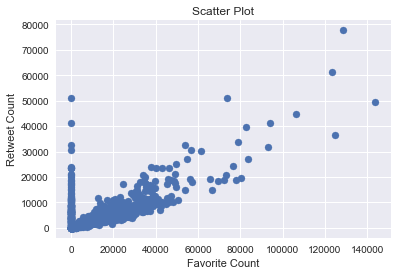

In [804]:
sns.set()

plt.scatter(twitter_archive_master['favorite_count'], twitter_archive_master['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Scatter Plot')
plt.show()

In [805]:
twitter_archive_master[twitter_archive_master['favorite_count'] == 0][['favorite_count', 'retweet_count']]

favorite_count  retweet_count
32               0.0          105.0
36               0.0        18800.0
68               0.0         6955.0
73               0.0         1314.0
74               0.0         6768.0
78               0.0           81.0
91               0.0        15079.0
97               0.0         1623.0
101              0.0           29.0
109              0.0         5830.0
124              0.0         2172.0
130              0.0          131.0
137              0.0         8707.0
146              0.0         2597.0
159              0.0         2271.0
160              0.0          858.0
165              0.0        32516.0
171              0.0         8580.0
180              0.0          179.0
182              0.0        11332.0
185              0.0          720.0
194              0.0         6373.0
195              0.0           49.0
204              0.0         2178.0
211              0.0        10421.0
212              0.0           23.0
222              0.0         5394.0
230              0.0         3552.0
231              0.0          467.0
250              0.0         8412.0
266              0.0        16953.0
272              0.0         1936.0
273              0.0        17824.0
281              0.0          156.0
285              0.0           37.0
286              0.0        12255.0
289              0.0        11199.0
302              0.0          611.0
303              0.0        30545.0
307              0.0         9080.0
309              0.0         1886.0
310              0.0        23353.0
319              0.0        11843.0
327              0.0          242.0
332              0.0           42.0
340              0.0         6891.0
341              0.0        10430.0
342              0.0        10831.0
356              0.0         6374.0
358              0.0         5605.0
365              0.0         3797.0
385              0.0         4409.0
396              0.0         1444.0
398              0.0         6151.0
405              0.0        12641.0
410              0.0        11090.0
414              0.0         7197.0
419              0.0         5426.0
421              0.0         3752.0
424              0.0         6288.0
430              0.0         7528.0
433              0.0          637.0
434              0.0         2909.0
437              0.0         1328.0
445              0.0        41169.0
446              0.0        21255.0
449              0.0        23456.0
452              0.0         6942.0
454              0.0         9149.0
461              0.0         3822.0
464              0.0         9603.0
468              0.0         5332.0
474              0.0         1180.0
475              0.0         6007.0
478              0.0         4660.0
484              0.0         6581.0
487              0.0         3646.0
505              0.0         7865.0
521              0.0         5560.0
529              0.0         6754.0
534              0.0         8298.0
537              0.0         6248.0
540              0.0        13249.0
542              0.0         6080.0
545              0.0         9134.0
551              0.0         3637.0
554              0.0         8434.0
557              0.0         6055.0
560              0.0         3315.0
567              0.0          306.0
573              0.0         4505.0
576              0.0         1845.0
580              0.0         4910.0
582              0.0         4456.0
585              0.0         5331.0
588              0.0         6291.0
593              0.0         7514.0
594              0.0         8873.0
595              0.0         7399.0
596              0.0         5659.0
597              0.0         2635.0
598              0.0         5381.0
599              0.0         6315.0
600              0.0         4421.0
601              0.0         2100.0
602              0.0         2224.0
603              0.0         6483.0
604              0.0         6688.0
605              0.0         3816.0
611              0.0        10128.0
614       

In [806]:
len(twitter_archive_master[twitter_archive_master['favorite_count'] == 0][['favorite_count', 'retweet_count']])

170

**There is another data quality issue above. It is unlikely that with the number of retweets, there are 0 favorites.**

**Define**

Remove tweets with 0 favorites from the dataset

**Code**

In [807]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['favorite_count'] == 0].index)

**Test**

In [808]:
sum(twitter_archive_master['favorite_count'] == 0)

0

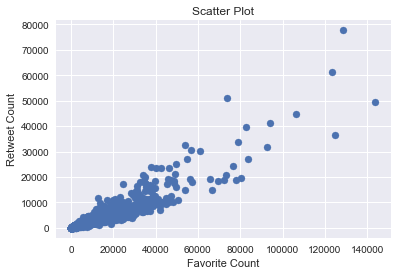

In [809]:
sns.set()

plt.scatter(twitter_archive_master['favorite_count'], twitter_archive_master['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Scatter Plot')
plt.show()

In [810]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.91610732493898561

**There is a strong positive correlation between favorite_count and retweet_count**

In [811]:
twitter_archive_master['name'].value_counts()

None              684
a                  55
Charlie            11
Lucy               11
Oliver             10
Cooper             10
Penny               9
Tucker              9
Sadie               8
Winston             8
the                 8
Lola                8
Toby                7
Daisy               7
Bo                  6
Koda                6
Stanley             6
Bella               6
Jax                 6
Oscar               6
an                  6
Bailey              6
Bentley             5
Phil                5
Buddy               5
Louis               5
Milo                5
Chester             5
Rusty               5
Scout               5
Leo                 5
Dave                5
Walter              4
Gus                 4
quite               4
Archie              4
Derek               4
very                4
Alfie               4
Dexter              4
Jeffrey             4
Cassie              4
Boomer              4
Duke                4
Larry               4
Jerry     

**Charlie and Lucy are the most popular dog names in the WeRateDogs twitter archive data.**

In [812]:
sum(twitter_archive_master[twitter_archive_master['name'] == 'Charlie']['retweet_count']) / 11

2735.2727272727275

In [813]:
sum(twitter_archive_master[twitter_archive_master['name'] == 'Charlie']['favorite_count']) / 11

10317.818181818182

**On average, dogs named Charlie have 2735 retweets and 10318 favorites.**

In [814]:
sum(twitter_archive_master[twitter_archive_master['name'] == 'Lucy']['retweet_count']) / 11

3198.7272727272725

In [815]:
sum(twitter_archive_master[twitter_archive_master['name'] == 'Lucy']['favorite_count']) / 11

10036.727272727272

**On average, dogs named Lucy have 3199 retweets and 10037 favorites.**

In [816]:
twitter_archive_master.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean()

retweet_count  favorite_count
dog_stage                               
Doggo        6043.137931    16894.402299
Floofer      4048.777778    10870.666667
Other        2548.691803     8361.696175
Pupper       2416.214286     7135.415179
Puppo        6345.208333    21442.375000

**Puppos have the highest retweet count on average compared to the other dog types. Puppos also have the highest favorite count on average compared to the other dog types**

In [817]:
twitter_archive_master.groupby('rating_numerator')[['retweet_count', 'favorite_count']].mean()

retweet_count  favorite_count
rating_numerator                               
1                   1730.900000     6094.200000
2                   1223.100000     2188.900000
3                    926.842105     2343.842105
4                    955.823529     2427.117647
5                   1023.636364     2595.484848
6                   1002.484848     2643.757576
7                   1017.462963     2912.166667
8                    844.742574     2311.643564
9                    797.258065     2373.219355
10                  1533.977169     4214.388128
11                  2179.014019     6767.745327
12                  3016.618000    10674.516000
13                  6412.633441    20876.987138
14                  6439.676923    20152.353846

**Dogs rated 14 out of 10 tend to have the highest retweet count compared to the other ratings. Keep in mind that since we pooled everything above 14 into the 14 category, it is more accurate to say that ratings greater than 13 have the highest retweet count on average compared to ratings 1 through 13. Dogs rated 13 out of 10 tend to have the highest favorite count on average compared to other ratings.**

In [818]:
twitter_archive_master.groupby(['rating_numerator', 'dog_stage'])['name'].count()

rating_numerator  dog_stage
1                 Other         10
2                 Other         10
3                 Other         18
                  Pupper         1
4                 Other         16
                  Pupper         1
5                 Doggo          1
                  Other         31
                  Pupper         1
6                 Other         32
                  Pupper         1
7                 Other         46
                  Pupper         8
8                 Doggo          3
                  Other         87
                  Pupper        11
9                 Other        138
                  Pupper        16
                  Puppo          1
10                Doggo          9
                  Floofer        1
                  Other        374
                  Pupper        51
                  Puppo          3
11                Doggo         22
                  Floofer        2
                  Other        348
                  Pupper   

**The majority of doggos are rated 13 out of 10. The majority of puppos which have the highest retweet and favorite count on average are rated 13 out of 10. The majority of other types of dogs are rated 12 out of 10. The majority of puppers are rated 12 out of 10. The majority of floofers are rated 12 or 13 out of 10.**

In [819]:
twitter_archive_master['p1'].value_counts()

Golden Retriever                  139
Labrador Retriever                 95
Pembroke                           89
Chihuahua                          81
Pug                                54
Chow                               41
Samoyed                            40
Toy Poodle                         38
Pomeranian                         38
Malamute                           29
Cocker Spaniel                     27
French Bulldog                     26
Chesapeake Bay Retriever           23
Miniature Pinscher                 22
Seat Belt                          21
German Shepherd                    20
Siberian Husky                     20
Staffordshire Bullterrier          19
Maltese Dog                        18
Shetland Sheepdog                  18
Teddy                              18
Eskimo Dog                         18
Cardigan                           17
Shih-Tzu                           17
Beagle                             17
Rottweiler                         17
Italian Grey

**The Golden Retriever is the most frequently predicted dog.**

In [820]:
twitter_archive_master['p1_dog'].value_counts()

True     1480
False     520
Name: p1_dog, dtype: int64

**520 of the first image predictions are not breeds of dogs.**

In [821]:
sum(twitter_archive_master[twitter_archive_master['p1'] == 'Golden Retriever']['retweet_count']) / 139

3562.73381294964

In [822]:
sum(twitter_archive_master[twitter_archive_master['p1'] == 'Golden Retriever']['favorite_count']) / 139

12138.381294964029

**Golden Retrievers on average have 3563 retweets and 12138 favorites.**

In [823]:
twitter_archive_master.groupby('p1')[['retweet_count', 'favorite_count']].mean().sort_values(by = 'retweet_count', ascending = False)

retweet_count  favorite_count
p1                                                           
Arabian Camel                    20074.500000    41724.000000
Conch                            19412.000000    45719.000000
Upright                          18547.000000    34566.000000
Bubble                           17067.500000    40293.000000
Gondola                          16357.500000    27308.500000
Angora                           16125.500000    46728.000000
Beaver                           15907.000000    38282.000000
Laptop                           14992.000000    66649.000000
Revolver                         14378.000000    34978.000000
Prison                           14312.000000    35061.500000
Remote Control                   14060.000000    30062.000000
Quilt                            12255.000000    33011.000000
Limousine                        11805.000000    46407.000000
Barbell                          10682.000000    34763.000000
Pillow                            9802.000000    13698.000000
Hippopotamus                      9666.250000    24724.500000
Microphone                        9334.000000    25616.000000
Fountain                          9279.000000    44791.000000
Pole                              9124.000000    33077.000000
Cash Machine                      9074.000000    18339.000000
Orange                            8635.000000    38951.000000
Basketball                        8323.000000    34759.000000
Padlock                           8305.000000    23687.000000
Cliff                             8156.000000    15755.000000
Home Theater                      7460.200000    22521.600000
Swing                             7132.714286    19807.857143
School Bus                        7071.000000    21553.000000
Brown Bear                        6939.000000    12435.333333
Standard Poodle                   6467.428571    15537.000000
Dough                             6315.000000    18135.000000
Gas Pump                          6151.000000    17822.000000
English Springer                  5838.888889    15405.888889
Afghan Hound                      5818.000000    16992.000000
Paper Towel                       5789.000000    24472.500000
Studio Couch                      5601.000000    13963.000000
Banana                            5370.000000    11192.000000
Vacuum                            5314.666667    11020.000000
Web Site                          5310.333333    16484.533333
Mortarboard                       5103.000000    20651.000000
Teapot                            5024.000000    17607.000000
Saluki                            5009.000000    23714.000000
Ice Bear                          4876.000000    12774.600000
French Bulldog                    4737.000000    18384.615385
Eskimo Dog                        4645.222222    11775.388889
Great Pyrenees                    4599.785714    12684.928571
Tabby                             4579.000000    16028.500000
Convertible                       4528.000000    22516.000000
Cowboy Boot                       4525.000000    17120.000000
Lakeland Terrier                  4512.250000    13558.750000
Long-Horned Beetle                4505.000000    15131.000000
Comic Book                        4501.500000    18960.000000
Samoyed                           4497.925000    13341.950000
Cardigan                          4423.352941    15038.705882
Flat-Coated Retriever             4415.375000    16523.625000
Irish Water Spaniel               4386.666667    16093.666667
Syringe                           4379.000000    17687.000000
Giant Panda                       4367.000000    11721.000000
Scorpion                          4334.000000     5812.000000
Marmot                            4333.000000    21122.000000
Restaurant                        4290.000000    11279.000000
Tibetan Mastiff                   4074.000000    11951.250000
Military Uniform                  4052.000000    13503.000000
Black-And-Tan Coonhound           4043.000000    16713.500000
Re

In [824]:
twitter_archive_master[twitter_archive_master['p1'] == 'Arabian Camel']

Unnamed: 0            tweet_id                  timestamp                                                                              source                                                                                                                                         text                                                                                                                                                                                            expanded_urls  \
155          155  861769973181624320  2017-05-09 02:29:07 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                 RT @dog_rates: "Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9  https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,http...   
536          536  806629075125202948  2016-12-07 22:38:52 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                "Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9                                                                          https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1   
2183        2183  668988183816871936  2015-11-24 03:03:06 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Honor to rate this dog. Lots of fur on him. Two massive tumors on back. Should get checked out. Very neat tho. 7/10 https://t.co/bMhs18elNF                                                                                                                                          https://twitter.com/dog_rates/status/668988183816871936/photo/1   

      rating_denominator  name  rating_numerator dog_stage  retweet_count  favorite_count                                          jpg_url  img_num             p1   p1_conf p1_dog           p2   p2_conf p2_dog              p3   p3_conf p3_dog  
155                   10  None                13     Other            NaN             NaN  https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg      2.0  Arabian Camel  0.366248  False  House Finch  0.209852  False  cocker_spaniel  0.046403   True  
536                   10  None                13     Other        39648.0         82507.0  https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg      2.0  Arabian Camel  0.366248  False  House Finch  0.209852  False  cocker_spaniel  0.046403   True  
2183                  10  None                 7     Other          501.0           941.0  https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg      1.0  Arabian Camel  0.999614  False        Bison  0.000228  False           llama  0.000067  False

**The first images predicted Arabian Camel have the highest retweet count on average. There are three images.**

In [825]:
twitter_archive_master.groupby('p1')[['retweet_count', 'favorite_count']].mean().sort_values(by = 'favorite_count', ascending = False)

retweet_count  favorite_count
p1                                                           
Laptop                           14992.000000    66649.000000
Angora                           16125.500000    46728.000000
Limousine                        11805.000000    46407.000000
Conch                            19412.000000    45719.000000
Fountain                          9279.000000    44791.000000
Arabian Camel                    20074.500000    41724.000000
Bubble                           17067.500000    40293.000000
Orange                            8635.000000    38951.000000
Beaver                           15907.000000    38282.000000
Prison                           14312.000000    35061.500000
Revolver                         14378.000000    34978.000000
Barbell                          10682.000000    34763.000000
Basketball                        8323.000000    34759.000000
Upright                          18547.000000    34566.000000
Pole                              9124.000000    33077.000000
Quilt                            12255.000000    33011.000000
Remote Control                   14060.000000    30062.000000
Gondola                          16357.500000    27308.500000
Microphone                        9334.000000    25616.000000
Hippopotamus                      9666.250000    24724.500000
Paper Towel                       5789.000000    24472.500000
Saluki                            5009.000000    23714.000000
Padlock                           8305.000000    23687.000000
Home Theater                      7460.200000    22521.600000
Convertible                       4528.000000    22516.000000
School Bus                        7071.000000    21553.000000
Marmot                            4333.000000    21122.000000
Mortarboard                       5103.000000    20651.000000
Swing                             7132.714286    19807.857143
Comic Book                        4501.500000    18960.000000
French Bulldog                    4737.000000    18384.615385
Cash Machine                      9074.000000    18339.000000
Dough                             6315.000000    18135.000000
Gas Pump                          6151.000000    17822.000000
Syringe                           4379.000000    17687.000000
Teapot                            5024.000000    17607.000000
Washer                            3433.000000    17535.000000
Cowboy Boot                       4525.000000    17120.000000
Afghan Hound                      5818.000000    16992.000000
Tricycle                          3160.000000    16842.000000
Black-And-Tan Coonhound           4043.000000    16713.500000
Flat-Coated Retriever             4415.375000    16523.625000
Web Site                          5310.333333    16484.533333
Grille                            3827.000000    16254.000000
Irish Water Spaniel               4386.666667    16093.666667
Tabby                             4579.000000    16028.500000
Wooden Spoon                      3256.000000    15798.000000
Cliff                             8156.000000    15755.000000
Standard Poodle                   6467.428571    15537.000000
English Springer                  5838.888889    15405.888889
Long-Horned Beetle                4505.000000    15131.000000
Cardigan                          4423.352941    15038.705882
Leonberg                          3762.333333    14646.666667
Studio Couch                      5601.000000    13963.000000
Pillow                            9802.000000    13698.000000
Basset                            3178.538462    13651.538462
Lakeland Terrier                  4512.250000    13558.750000
Leopard                           2456.000000    13532.000000
Military Uniform                  4052.000000    13503.000000
Border Terrier                    3296.571429    13358.000000
Samoyed                           4497.925000    13341.950000
Bedlington Terrier                2791.400000    12808.600000
Ice Bear                          4876.000000    12774.600000
Gr

In [826]:
twitter_archive_master[twitter_archive_master['p1'] == 'Laptop']

Unnamed: 0            tweet_id                  timestamp                                                                              source                                                                                                                                       text                                                                                                                    expanded_urls  rating_denominator    name  rating_numerator dog_stage  retweet_count  \
95           95  873697596434513921  2017-06-11 00:25:14 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF  https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1                  10  Walter                14     Other            NaN   
123         123  868880397819494401  2017-05-28 17:23:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                 This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF                                                                  https://twitter.com/dog_rates/status/868880397819494401/photo/1                  10  Walter                14     Other        14992.0   

     favorite_count                                          jpg_url  img_num      p1   p1_conf p1_dog              p2   p2_conf p2_dog       p3  p3_conf p3_dog  
95              NaN  https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg      1.0  Laptop  0.153718  False  French Bulldog  0.099984   True  printer  0.07713  False  
123         66649.0  https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg      1.0  Laptop  0.153718  False  French Bulldog  0.099984   True  printer  0.07713  False

**The first images predicted Laptop have the highest favorite count on average. There are two.**

In [827]:
twitter_archive_master.groupby('p1_dog')[['retweet_count', 'favorite_count']].mean()

retweet_count  favorite_count
p1_dog                               
False     2699.363636     7897.646035
True      2742.139472     9224.598510

**When the first image is predicted a dog breed it has a higher retweet count and favorite count compared to when it isn't on average.**

In [828]:
twitter_archive_master.groupby('img_num')[['retweet_count', 'favorite_count']].mean()

retweet_count  favorite_count
img_num                               
1.0        2518.734658     8147.309760
2.0        3876.465969    13074.345550
3.0        4047.774194    12716.032258
4.0        4826.300000    16072.466667

**When the fourth image is predicted as most accurate, the retweet count and favorite count is the highest on average.**